# Hashtables

In [3]:
import numpy as np
from lolviz import *

## what is the issue?

In [4]:
# Riley

In data science, we always need to deal with very large data sets. Being able to find elements of interest quickly is really important.<br>
In python, we often use lists to perform insertion, deletion, and search operations. However, the issue is these operations can be really slow dealing with large data sets.<br>
So, what actually caused this issue?<br>
The answer is about how computer systems store and extract value.

In [5]:
n = 500
A = list(np.random.randint(low=0, high=1_000_000, size=n))

In [6]:
print("\t  ", "ID", "\t      ", "value")
for a in A[:10]:
    print("-->", id(a), "--", a)
print("\t  ", "...", "\t       ", "...")

	   ID 	       value
--> 140654824148592 -- 241386
--> 140654822305168 -- 852961
--> 140654822305328 -- 338954
--> 140654561745424 -- 919982
--> 140654561745360 -- 656242
--> 140654561745232 -- 544754
--> 140654561744624 -- 43777
--> 140654561745328 -- 750324
--> 140654561745456 -- 580538
--> 140654561745488 -- 64952
	   ... 	        ...


As we all know, each object in python has an ID which indicates the address of the object in memory. In this example list, we can see those elements all have their own IDs which are different from each other. <br>It's just like they are all living in different houses. When we want to find any of them, we need to visit the houses one by one to see whether it lives here or not.<br> The time we will spend on finding an element will increase as the number of houses increases, and they are related linearly, which is an intuitive conduction.<br>Let's give it a simple proof. We added the list size graudually with the same interval ten thousand and recorded the time consumed to search for one element on average and then draw them in a plot. It shows a line, of course.

In [7]:
def lsearch(A, x):
    for a in A:
        if a == x:
            return True
    return False

In [8]:
n = 10000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
# search for 50 times
%time for a in range(50): lsearch(A, a)

CPU times: user 80.3 ms, sys: 3.68 ms, total: 84 ms
Wall time: 84.8 ms


In [9]:
n = 20000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
# search for 50 times
%time for a in range(50): lsearch(A, a)

CPU times: user 119 ms, sys: 2.21 ms, total: 121 ms
Wall time: 120 ms


In [10]:
n = 30000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
# search for 50 times
%time for a in range(50): lsearch(A, a)

CPU times: user 172 ms, sys: 2.83 ms, total: 175 ms
Wall time: 177 ms


In [11]:
n = 40000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
# search for 50 times
%time for a in range(50): lsearch(A, a)

CPU times: user 223 ms, sys: 1.14 ms, total: 224 ms
Wall time: 223 ms


In [12]:
n = 50000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
# search for 50 times
%time for a in range(50): lsearch(A, a)

CPU times: user 276 ms, sys: 1.79 ms, total: 277 ms
Wall time: 277 ms


In [13]:
lineartime = np.array([83, 144, 192, 240, 281]) / 50
datasize = [1, 2, 3, 4, 5]

Text(0.5, 1.0, 'Linear Search Time - List Length')

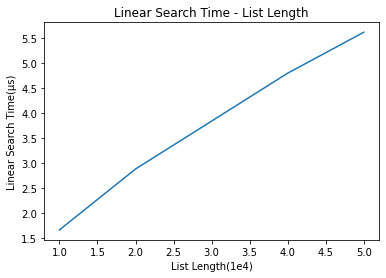

In [14]:
import matplotlib.pyplot as plt

plt.plot(datasize, lineartime)
plt.xlabel("List Length(1e4)")
plt.ylabel("Linear Search Time(μs)")
plt.title("Linear Search Time - List Length")

By the way if you calculate the slope, you'll find it's really close to 1. <br>
The point is, it clearly shows how time-consuming linear search will be when the data size becomes larger. But the thing is different when comes to dictionary. We built a sample dictionary whose length is the same as the list and do exactly the same thing to it.

In [15]:
def dsearch(D, x):
    try:
        return D[x]
    except:
        return False

In [16]:
n = 10000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
D = dict(zip(A, A))
%time for a in range(50): dsearch(D,a)
n = 20000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
D = dict(zip(A, A))
%time for a in range(50): dsearch(D,a)
n = 30000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
D = dict(zip(A, A))
%time for a in range(50): dsearch(D,a)
n = 40000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
D = dict(zip(A, A))
%time for a in range(50): dsearch(D,a)
n = 50000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
D = dict(zip(A, A))
%time for a in range(50): dsearch(D,a)

CPU times: user 17 µs, sys: 1 µs, total: 18 µs
Wall time: 18.1 µs
CPU times: user 27 µs, sys: 1e+03 ns, total: 28 µs
Wall time: 29.8 µs
CPU times: user 29 µs, sys: 8 µs, total: 37 µs
Wall time: 50.1 µs
CPU times: user 22 µs, sys: 1 µs, total: 23 µs
Wall time: 22.9 µs
CPU times: user 16 µs, sys: 2 µs, total: 18 µs
Wall time: 19.8 µs


In [17]:
dictionarytime = np.array([29.3, 21, 30, 26.9, 26.9]) / 50
datasize = [1, 2, 3, 4, 5]

Text(0.5, 1.0, 'Search Time - Data Size')

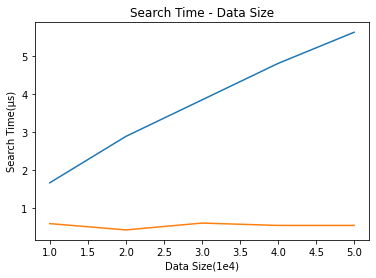

In [18]:
import matplotlib.pyplot as plt

plt.plot(datasize, lineartime)
plt.plot(datasize, dictionarytime)

plt.xlabel("Data Size(1e4)")
plt.ylabel("Search Time(μs)")
plt.title("Search Time - Data Size")

Interesting things appear. It shows that the dictionary search time is basically not influnced by the data size. <br>
Why is that?<br>
If you google this question, you may see people say: "Dictionary uses a hash lookup ..."<br>
Now the new term appears, followed by more quesions -- what is hash exactly and how it works?<br>
Aydin is going to talk about this topic. 

## How does the hashtable works?

In [19]:
# Aydin

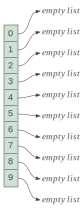

In [20]:
num_buckets = 10
buckets = [[] for i in range(num_buckets)]
objviz(buckets)

In [21]:
n = 5_000_000
A = list(np.random.randint(low=0, high=1_000_000, size=n))
A[0:10]

[23150, 596032, 278418, 246980, 991931, 178310, 907615, 757267, 561987, 90448]

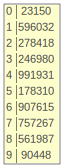

In [22]:
objviz(A[0:10])

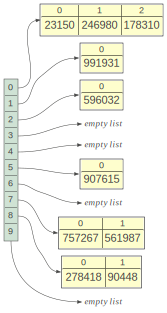

In [23]:
# simple hash function
def hash_simple(x, num_buckets):
    return x % num_buckets


buckets = [[] for i in range(num_buckets)]
for a in A[0:10]:
    buckets[hash_simple(a, num_buckets)].append(a)

objviz(buckets)

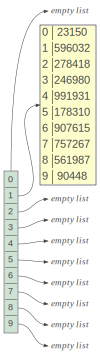

In [24]:
# naive "hash function"
def hash_naive(x, num_buckets):
    return 1


buckets = [[] for i in range(num_buckets)]
for a in A[0:10]:
    buckets[hash_naive(a, num_buckets)].append(a)

objviz(buckets)

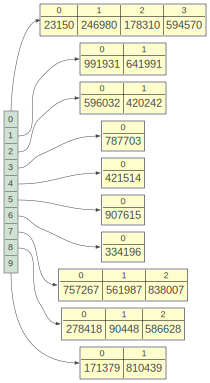

In [25]:
# adding additional data
buckets = [[] for i in range(num_buckets)]
for a in A[0:20]:
    buckets[hash_simple(a, num_buckets)].append(a)

objviz(buckets)

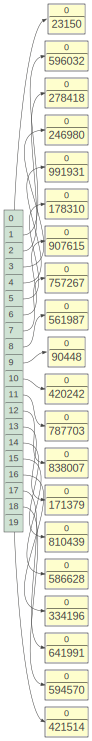

In [26]:
buckets_perfect = [[] for _ in range(20)]
for i, a in enumerate(A[:20]):
    buckets_perfect[i].append(a)

objviz(buckets_perfect)

## Hashtable Imperfections and How to Address Them


In [27]:
# Daniel

For now, let us construct a table with 10 buckets, and then consider the set of integers from 0 to 10.

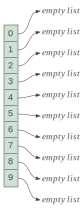

In [28]:
table_3 = [[] for i in range(10)]  # make sure each bucket is a separate list
objviz(table_3)

In [29]:
def p_hash(key):  # only takes integers
    return key


def bucket_index(table, key):  # allows all hashed values to go into table
    return p_hash(key) % len(table)

In [30]:
table_3 = [[] for i in range(10)]
for key in range(10):
    table_3[bucket_index(table_3, key)].append(
        (key, np.random.random())
    )  # inserting key/value pair
table_3

[[(0, 0.988931224628849)],
 [(1, 0.429898875557737)],
 [(2, 0.17404142095011266)],
 [(3, 0.3990833435635407)],
 [(4, 0.27558014614641646)],
 [(5, 0.833653442920613)],
 [(6, 0.6943071485504397)],
 [(7, 0.6828296022271529)],
 [(8, 0.3224640652824533)],
 [(9, 0.6192318426715594)]]

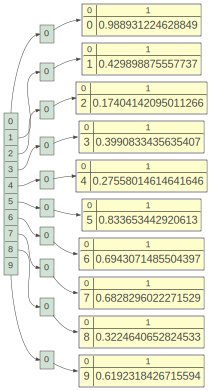

In [31]:
objviz(table_3)  # note every bucket has one distinct key/value pair

However, depending on the size of the bucket and the hash function itself, there are a number of problems that can arise.

### Problem 1: Collision via Imperfect Hashing

Let us consider the following hash function:

In [32]:
def hash_1(key):  # takes only integers
    return 2 * key


def bucket_index(table, key):  # allows all hashes to be in a bucket
    return hash_1(key) % len(table)

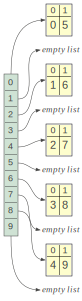

In [33]:
table_1 = [[] for i in range(10)]
for key in range(10):
    table_1[bucket_index(table_1, key)].append(key)
objviz(table_1)

Notice the issue?

One way we can ensure this does not occur is by constructing the table in such a way that our hashed values can never overlap.

How? Number theory.

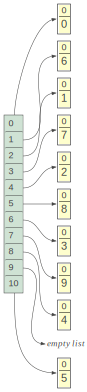

In [34]:
new_table_1 = [[] for i in range(11)]
for key in range(10):
    new_table_1[bucket_index(new_table_1, key)].append(key)
objviz(new_table_1)

Now, even though we are using the same hash function, because the number of buckets is prime, we know that so long as the hash is a perfect hash, we shouldn't have a collision so long as there are *enough* buckets.

### Problem 2: Collision via Table Size

Pretty straightforward. Not enough buckets? Collisions.

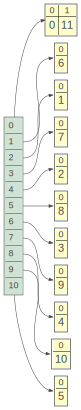

In [35]:
table_2 = [[] for i in range(11)]
for key in range(12):
    table_2[bucket_index(table_2, key)].append(key)
objviz(table_2)

### Problem 3: Unique hash for all keys

So we have a data structure to map integers, but what about something else, like strings?

In [36]:
def new_hash(o):  # accepts only strings and integers
    if type(o) == str:
        h = 0
        for char in o:
            h += ord(char)
        return h
    elif type(o) == int:
        return o
    else:
        return None


def new_index(table, key):
    return new_hash(key) % len(table)

In [37]:
new_hash("hash")

420

In [38]:
sample_words = ["hash", "potato", 1, 3, "fluster", 10, "tomato", 7, "restful"]
sample_values = [
    "the function",
    ["boil", "mash", "stew"],
    "class start",
    {"unique 1", "unique 2"},
    "currently",
    "other class",
    57,
    "lucky",
    [[]],
]

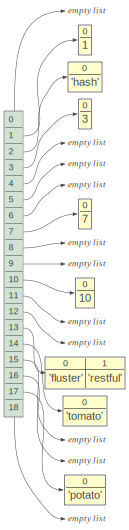

In [39]:
table_3 = [[] for i in range(19)]
for word in sample_words:
    table_3[new_index(table_3, word)].append(word)
objviz(table_3)

Issue? Some words might map to the same value. For example, anagrams.

To correct this issue, we need to improve the hash function to take this into account.

In [40]:
def perfect_hash(o):  # accepts strings and integers; rejects the rest
    if type(o) == int:
        return o
    elif type(o) == str:
        h = 0
        for c in o:
            h = h * 31 + ord(c)  # differentiates between words
        return h
    else:
        return None


def b_index(table, key):
    return perfect_hash(key) % len(table)

In [41]:
perfect_hash("restful")

104176726313

In [42]:
perfect_hash("fluster")

93728916413

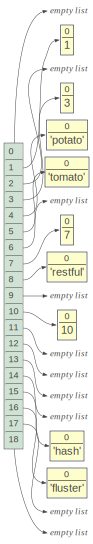

In [43]:
table_3 = [[] for i in range(19)]
for word in sample_words:
    table_3[b_index(table_3, word)].append(word)
objviz(table_3)